In [1]:
import random

Basics of Probability

In [5]:
#tossing a coin 10,000 times
def toss_coin(trial=10000):
    heads=0
    tails=0
    for i in range(trial):
        choice=random.choice(['heads', 'tails'])
        if choice == 'heads':   
            heads += 1
        else:
            tails += 1
    prob_H=heads/trial
    prob_T=tails/trial
    print(f"Probability of Heads: {prob_H:.5f}")
    print(f"Probability of Tails: {prob_T:.5f}")

# Running the coin toss simulation
toss_coin(10000)

Probability of Heads: 0.49580
Probability of Tails: 0.50420


In [ ]:
#rolling two die and computing the probability of sum=7
def roll_dice(trial=10000):
    sum_count_7=0
    for i in range(trial):
        die1= random.randint(1, 6)
        die2= random.randint(1, 6)
        if die1 + die2 == 7:
            sum_count_7 += 1
    prob_sum_7 = sum_count_7 / trial
    print(f"Probability of getting sum=7 when two dices are rolled: {prob_sum_7:.5f}")

# Running the dice roll simulation
roll_dice(10000)

Probability of sum=7 when two dices are rolled: 0.16090


In [7]:
#probability of getting at least one "6" in 10 rolls of a die
def prob_at_least_one_six(trials=10000,rolls=10):
    success_count = 0
    for _ in range(trials):
        six=False
        for i in range(rolls):
            die= random.randint(1, 6)
            if die == 6:
                six = True
                break
        if six:
                success_count+= 1
    prob = success_count / trials
    print(f"Probability of getting at least one '6' in {rolls} rolls in {trials} trials: {prob:.5f}")
    
# Running the probability of at least one "6" simulation
prob_at_least_one_six(10000, 10)

Probability of getting at least one '6' in 10 rolls in 10000 trials: 0.83730


Conditional Probability and Bayes' Theorem

In [12]:
#drawing a red ba;; given thet the previous ball was blue
def prob_red_given_blue(trials=10000):
    balls=["r"]*5+["g"]*7+["b"]*8
    prev_blue=0
    red_afer_blue=0
    total_red=0
    blue_before_red=0
    prev_ball= None
    for i in range(trials):
        ball= random.choice(balls)
        if prev_ball == "b":
            prev_blue += 1
            if ball == "r":
                red_afer_blue += 1
        if ball == "r":
            total_red += 1
            if prev_ball == "b":
                blue_before_red += 1
        prev_ball = ball
    p_red_given_blue= red_afer_blue / prev_blue if prev_blue > 0 else 0
    p_red= balls.count("r") / len(balls)
    p_blue= balls.count("b") / len(balls)
    p_blue_given_red= blue_before_red / total_red if total_red > 0 else 0

    Bayes=(p_blue_given_red * p_red) / p_blue if p_blue > 0 else 0
    print(f"Probability of drawing a red ball given the previous ball was blue: {p_red_given_blue:.5f}")
    print(f"Bayes' theorem result: {Bayes:.5f}")
    print(f"Difference between the two probabilities: {abs(p_red_given_blue - Bayes):.5f}")
# Running the probability of red given blue simulation
prob_red_given_blue(10000)

Probability of drawing a red ball given the previous ball was blue: 0.24450
Bayes' theorem result: 0.24239
Difference between the two probabilities: 0.00211


Random Variables and Discrete Probability

In [14]:
import numpy as np
#Computing the empirical mean, variance, and standard deviation of a random variable
def empirical_stats(values=[1,2,3], probabilities= [0.25, 0.35, 0.4]):
    sample=np.random.choice(values, size=10000, p=probabilities)
    mean=np.mean(sample)    
    variance=np.var(sample)
    std_dev=np.std(sample)
    print(f"Empirical Mean: {mean:.5f}")
    print(f"Empirical Variance: {variance:.5f}")    
    print(f"Empirical Standard Deviation: {std_dev:.5f}")
# Running the empirical statistics simulation
empirical_stats([1, 2, 3], [0.25, 0.35, 0.4])

Empirical Mean: 2.17080
Empirical Variance: 0.63003
Empirical Standard Deviation: 0.79374


Continuous Random Variable

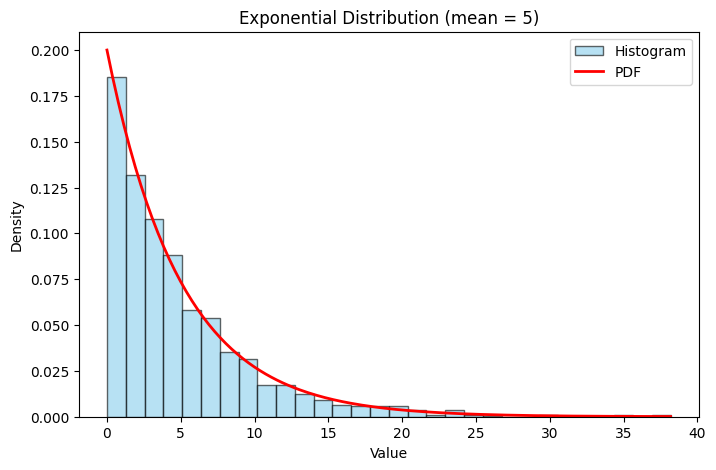

In [ ]:
#exponential distribution with mean=5 and plotting the PDF and histogram
import numpy as np
import matplotlib.pyplot as plt
mean = 5
lambda_param = 1 / mean  # Rate parameter
sample_size = 2000
samples = np.random.exponential(scale=mean, size=sample_size)
plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogram")
x = np.linspace(0, np.max(samples), 200)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r', linewidth=2, label="PDF")
plt.title("Exponential Distribution (mean = 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


Central Limit Theorem

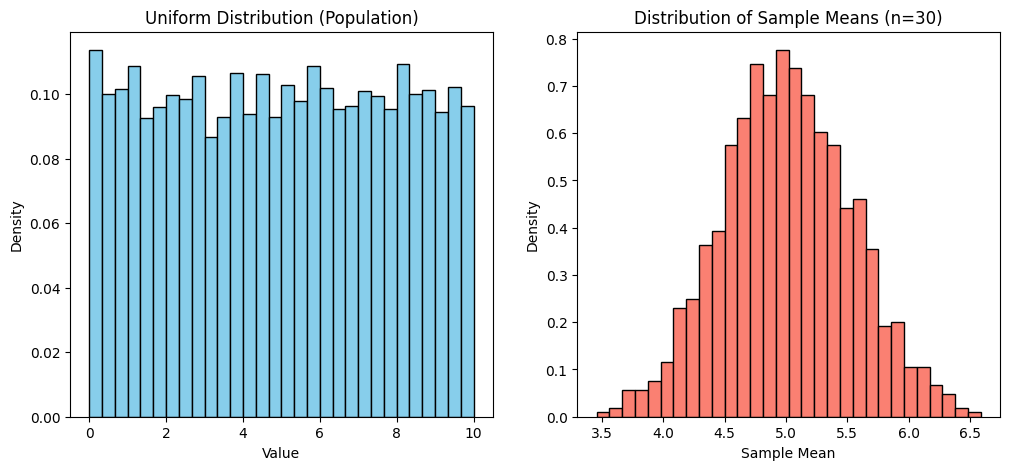

In [ ]:
#Uniform Distribution of 10000 random numbers and Sample Means by drawing 1000 samples of size 30
import numpy as np
import matplotlib.pyplot as plt
population_size = 10000
population = np.random.uniform(low=0, high=10, size=population_size)
n_samples = 1000
sample_size = 30
sample_means = []
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(population, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Uniform Distribution (Population)")
plt.xlabel("Value")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.hist(sample_means,bins=30, color='salmon', edgecolor='black', density=True)
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.show()
